In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U pandasql

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Importing the required libraries:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

In [2]:
#Reading the Dataframe:
dfvg = pd.read_csv(r'C:\Users\Public\ecommdata.csv',encoding= 'unicode_escape')

In [3]:
#Information of a Dataframe:
dfvg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#Displaying the Dataframe:
display(dfvg)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [6]:
#Removing the duplicates:
ddfvg = dfvg.drop_duplicates()

In [7]:
#Dropping the null data: 
df_vg = ddfvg.dropna()

In [8]:
#Describing the dataframe:
df_vg.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


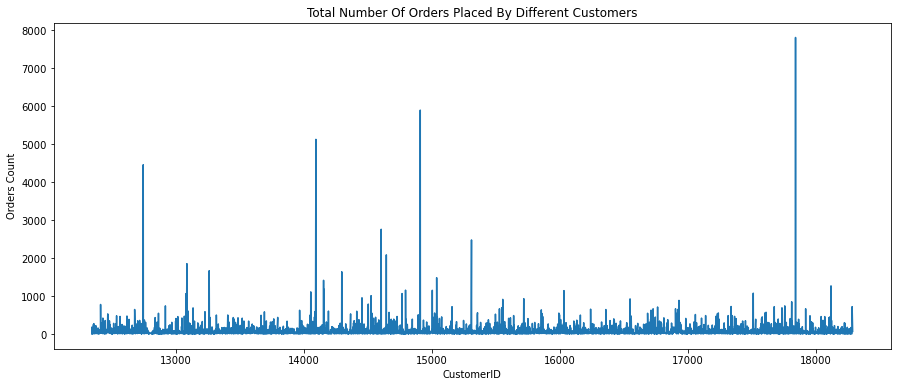

In [10]:
#Total Orders of each customerid:
tot_ord = df_vg.groupby(['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(tot_ord.CustomerID, tot_ord.InvoiceNo)
plt.xlabel('CustomerID')
plt.ylabel('Orders Count')
plt.title('Total Number Of Orders Placed By Different Customers')
plt.show()

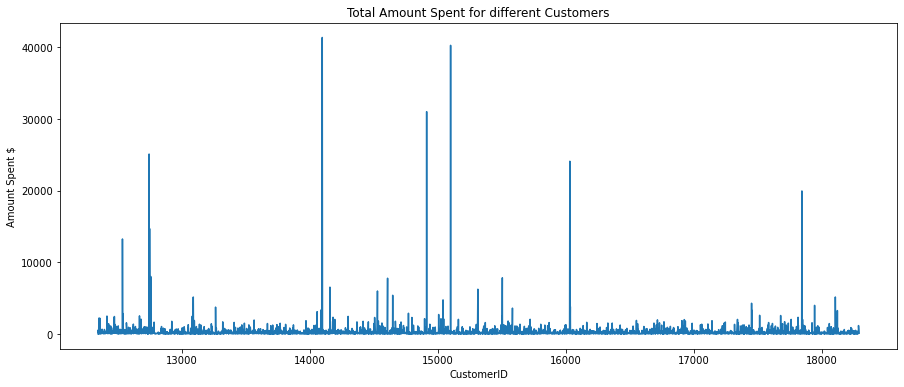

In [55]:
#Total amount spending by the customers:
Tot_amt_spnt = df_vg.groupby(by=['CustomerID','Country'], as_index=False)['UnitPrice'].sum()

plt.subplots(figsize=(15,6))
plt.plot(Tot_amt_spnt.CustomerID, Tot_amt_spnt.UnitPrice)
plt.xlabel('CustomerID')
plt.ylabel('Amount Spent $')
plt.title('Total Amount Spent for different Customers')
plt.show()

In [13]:
df_vg['InvoiceDate'] = pd.to_datetime(df_vg.InvoiceDate, format='%m/%d/%Y %H:%M')

C:\Users\vkoyya\AppData\Local\Temp/ipykernel_8816/2943981551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vg['InvoiceDate'] = pd.to_datetime(df_vg.InvoiceDate, format='%m/%d/%Y %H:%M')


In [16]:
#Extracting the year,month,day and hour columns:
df_vg.insert(loc=2, column='yearmonth', value=df_vg['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df_vg.insert(loc=3, column='month', value=df_vg.InvoiceDate.dt.month)
df_vg.insert(loc=4, column='day', value=(df_vg.InvoiceDate.dt.dayofweek)+1)
df_vg.insert(loc=5, column='hour', value=df_vg.InvoiceDate.dt.hour)

ValueError: cannot insert yearmonth, already exists

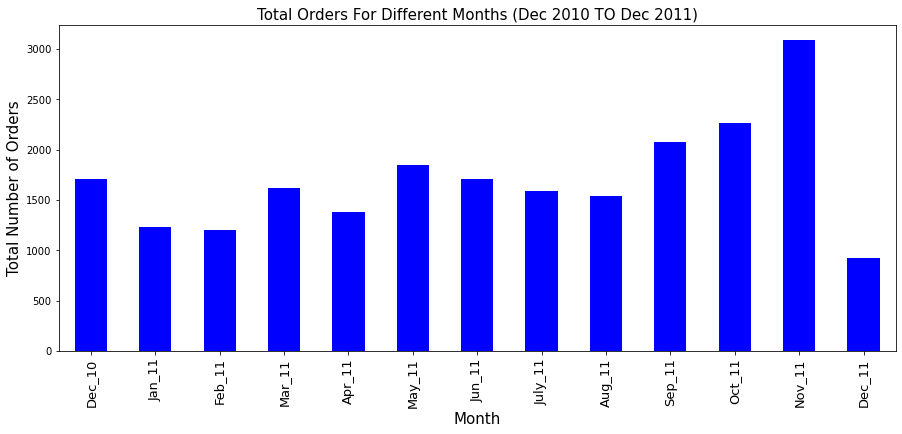

In [40]:
ax = df_vg.groupby('InvoiceNo')['yearmonth'].unique().value_counts().sort_index().plot(kind = 'bar',color='blue',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Total Number of Orders',fontsize=15)
ax.set_title('Total Orders For Different Months (Dec 2010 TO Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='vertical', fontsize=13)
plt.show()

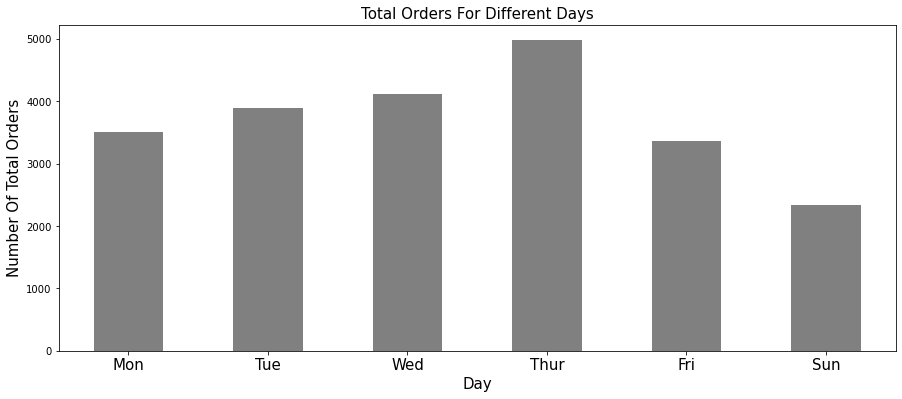

In [46]:
ax = df_vg.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',color='gray',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number Of Total Orders',fontsize=15)
ax.set_title('Total Orders For Different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

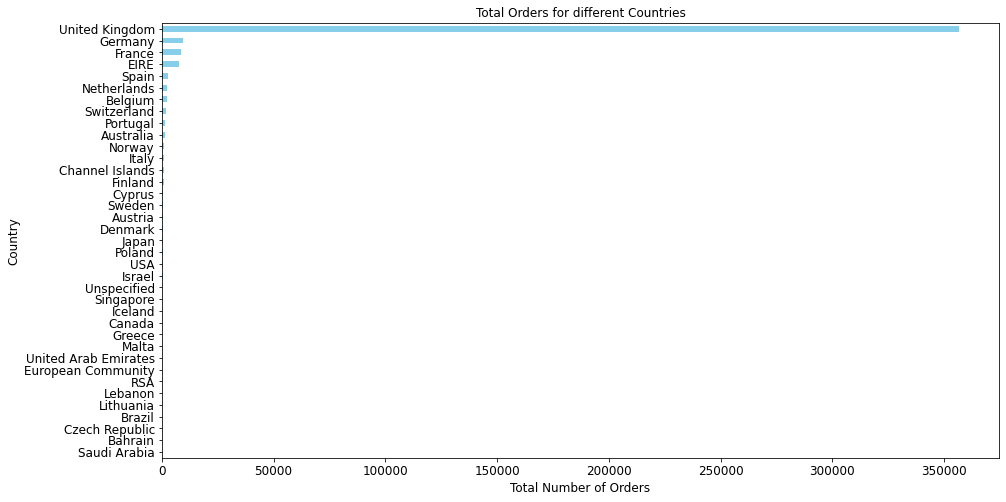

In [44]:
group_country_orders = df_vg.groupby('Country')['InvoiceNo'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind= 'barh', fontsize=12, color='skyblue')
plt.xlabel('Total Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Total Orders for different Countries', fontsize=12)
plt.show()